In [106]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from pywaffle import Waffle
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objects as go


In [3]:
df_gapminder = pd.read_csv('gapminderData2.csv')

In [10]:
# 1. A partir del dataset (A), obtenga un scatterplot que permita visualizar la relación 
# entre PIB per Cápita y Nacimientos por Mujer, en el año 2007

df_gapminder_2007 = df_gapminder[df_gapminder['year'] == 2007]

fig = px.scatter(
    df_gapminder_2007,
    x="gdpPercap", 
    y="bornPerwom", 
    title='PIB per Cápita vs Nacimientos por Mujer (2007)')
fig.show()

In [12]:
# 2. Transforme el gráfico anterior en un bubblechart, que considere la 
# población de cada país como tamaño de la burbuja.

fig = px.scatter(
    df_gapminder_2007,
    x="gdpPercap",
    y="bornPerwom",
    size="pop",
    title='PIB per Cápita vs Nacimientos por Mujer (2007)',
    size_max=70,
    color="continent",
    hover_name="country",)
fig.show()

In [19]:
# 3. Realice una animación del bubblechart anterior en el tiempo,
# considerando todos los años del dataset (A).

fig = px.scatter(
    df_gapminder,
    x="gdpPercap",
    y="bornPerwom",
    size="pop",
    title='PIB per Cápita vs Nacimientos por Mujer (2007)',
    size_max=70,
    color="continent",
    hover_name="country",
    animation_frame="year",
    animation_group="country",
    range_x=[1,60000],
    range_y=[0,10],)
fig.show()


In [86]:
df_migrantes = pd.read_excel('MigrantesChile (2005-2016).xlsx',
                             sheet_name='Migrantes',
                             skipfooter=3)

In [76]:
# 4. Realice un Waffle Chart con el aporte de los países sudamericanos
# a la inmigración nacional, en un año determinado, a partir del dataset (B)

# Se prepara el dataset para el waffle chart

# Obtener solo los de sudamerica
df_migrantes_sudamerica = df_migrantes[df_migrantes['Continent'] == 'America']

south_america = ['Argentina', 'Bolivia', 'Brasil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']

df_migrantes_sudamerica = df_migrantes_sudamerica[df_migrantes_sudamerica['Country'].isin(south_america)]

df_migrantes_sudamerica_2013 = df_migrantes_sudamerica[['Country', 2013]]

df_migrantes_sudamerica_2013 = df_migrantes_sudamerica_2013.rename(columns={2013: 'Migrantes'})

# Total de migrantes
total_migrantes = df_migrantes_sudamerica_2013['Migrantes'].sum()

# Porcentaje de migrantes por país
df_migrantes_sudamerica_2013['Porcentaje'] = df_migrantes_sudamerica_2013['Migrantes'] / total_migrantes

widht = 40
height = 10

total_waffles = widht * height

# Porcentaje de migrantes por waffle
df_migrantes_sudamerica_2013['PorcentajeWaffle'] = round(df_migrantes_sudamerica_2013['Porcentaje'] * total_waffles)

df_migrantes_sudamerica_2013 = df_migrantes_sudamerica_2013.sort_values(by=['Migrantes'], ascending=False)

df_migrantes_sudamerica_2013


,Country,Migrantes,Porcentaje,PorcentajeWaffle
127,Peru,48517,0.385059,154.0
22,Bolivia,30611,0.242946,97.0
36,Colombia,30138,0.239192,96.0
9,Argentina,7436,0.059016,24.0
47,Ecuador,4992,0.039619,16.0
172,Venezuela,2015,0.015992,6.0
126,Paraguay,1331,0.010564,4.0
170,Uruguay,956,0.007587,3.0
70,Guyana,3,0.000024,0.0
157,Suriname,0,0.000000,0.0


C:\Users\mvill\AppData\Local\Temp\ipykernel_14680\1155694927.py:24: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



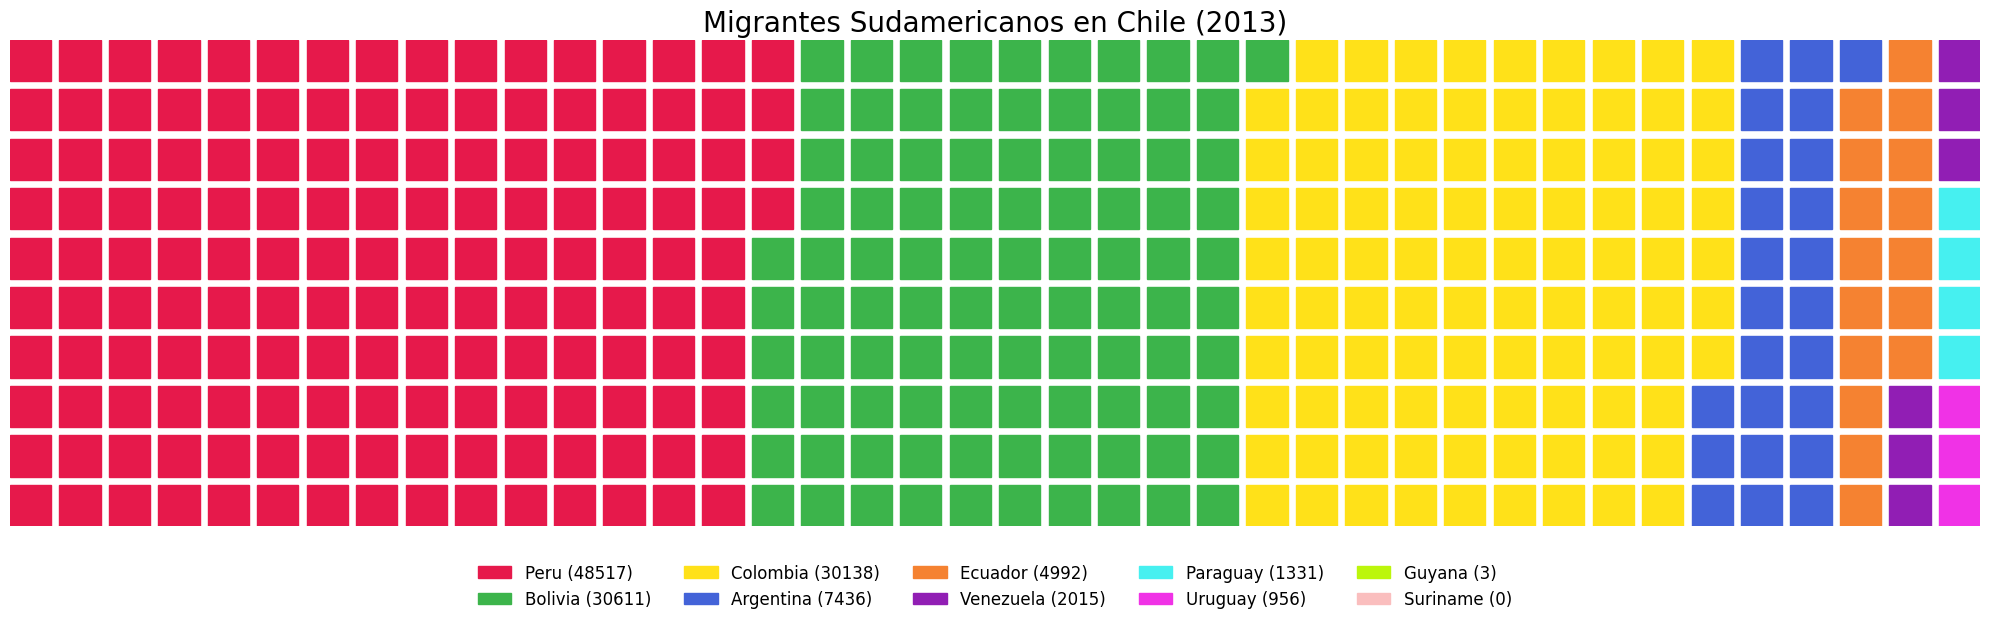

In [84]:
# Se crea el waffle chart
fig = plt.figure(
    FigureClass=Waffle,
    rows=height,
    columns=widht,
    values=df_migrantes_sudamerica_2013['PorcentajeWaffle'],
    colors=(
        "#e6194b", "#3cb44b", "#ffe119", "#4363d8", "#f58231",
        "#911eb4", "#46f0f0", "#f032e6", "#bcf60c", "#fabebe",
    ),
    title={
        'label': 'Migrantes Sudamericanos en Chile (2013)',
        'loc': 'center',
        'fontdict': {'fontsize': 20}},
    labels=[ f"{k} ({v})" for k, v in df_migrantes_sudamerica_2013[['Country', 'Migrantes']].values],
    legend={'loc': 'lower center',
            'bbox_to_anchor': (0.5, -0.2),
            'ncol': 5,
            'framealpha': 0,
            'fontsize': 12},
    figsize=(20, 15),
    starting_location='NW',
)
fig.show()


In [99]:
# 5. Realice un Heat Map años versus los cinco países con más inmigrantes en total,
# para el dataset (B).

# Se prepara el dataset para el heatmap

df_migrantes_total = df_migrantes[['Country', 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]]

df_migrantes_total['Total'] = df_migrantes_total.sum(axis=1, numeric_only=True) 

df_migrantes_total = df_migrantes_total.sort_values(by=['Total'], ascending=False)

df_migrantes_top5 = df_migrantes_total.head(5)

df_migrantes_top5

C:\Users\mvill\AppData\Local\Temp\ipykernel_14680\3404178249.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
127,Peru,25966,32746,63869,47336,56586,38048,40628,49643,48517,49900,59767,53624,566630
36,Colombia,2179,3195,4834,5563,7697,8921,14362,20875,30138,33939,44535,47352,223590
22,Bolivia,2420,2815,7448,5374,7801,7423,9189,17310,30611,34978,39126,27852,192347
9,Argentina,6263,6114,5656,5345,5453,5387,5438,6548,7436,8326,9605,8176,79747
47,Ecuador,2956,3135,4352,3933,4674,3624,3938,4679,4992,5309,6374,7261,55227


In [110]:
# Se crea el heatmap

fig = go.Figure(data=go.Heatmap(
                        z=df_migrantes_top5.iloc[:, 1:13],
                        x=df_migrantes_top5.columns[1:13],
                        y=df_migrantes_top5['Country'],
                        colorscale='Viridis'))

fig.update_layout(
    title='Top 5 Países con más Inmigrantes en Chile (2005-2016)',
    xaxis_nticks=24)

fig.show()


In [8]:
metamorfosis_novela = open('La_metamorfosis.txt', 'r').read()

In [112]:
stopwords_es = open('stopwords.txt', 'r').read().split('\n')

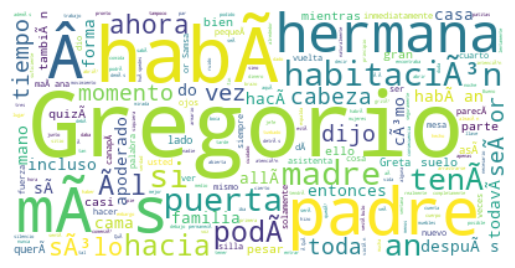

In [113]:
# 6. Con el dataset (C), realice un Word Cloud del libro 
# "La Metamorfosis", de Franz Kafka. Excluya palabras destacadas
# que no correspondan a verbos, adjetivos o sustantivos.

# Se prepara el dataset para el wordcloud
stopwords = set(stopwords_es)

# Stopwords en español


metamorfosis_ws = WordCloud(
    background_color='white',
    stopwords=stopwords,
)

metamorfosis_ws.generate(metamorfosis_novela)

# Se crea el wordcloud

plt.imshow(metamorfosis_ws, interpolation='bilinear')
plt.axis('off')
plt.show()